Disciplina: MÉTODOS NUMÉRICOS COMPUTACIONAIS

Turma: 145R

Aluno e Matrícula: Lucas Mesquita Braz - 2015102254

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from skimage import io
from google.colab.patches import cv2_imshow
from numpy.linalg import svd

In [ ]:
def compress_image(img_name, img, k):
    print("processing...")

    # splitting the array into three 2D array (svd only apply on 2D array)
    r = img[:, :, 0]  # array for R
    g = img[:, :, 1]  # array for G
    b = img[:, :, 2]  # array for B

    print("compressing...")

    # Calculating the svd components for all three arrays
    ur, sr, vr = svd(r, full_matrices=False)
    ug, sg, vg = svd(g, full_matrices=False)
    ub, sb, vb = svd(b, full_matrices=False)

    print('dimensões do canal r: {}'.format(r.shape))

    # Forming the compress image with reduced information
    # We are selecting only k singular values for each array to make image which will exclude some information from the
    # image while image will be of same dimension

    # ur (mxk), diag(sr) (kxk) and vr (kxn) if image is off (mxn)
    # so let suppose we only selecting the k1 singular value from diag(sr) to form image

    rr = np.dot(ur[:, :k], np.dot(np.diag(sr[:k]), vr[:k, :]))
    rg = np.dot(ug[:, :k], np.dot(np.diag(sg[:k]), vg[:k, :]))
    rb = np.dot(ub[:, :k], np.dot(np.diag(sb[:k]), vb[:k, :]))

    print("arranging...")

    # Creating a array of zeroes; shape will be same as of image matrix
    rimg = np.zeros(img.shape)

    # Adding matrix for R, G & B in created array
    rimg[:, :, 0] = rr
    rimg[:, :, 1] = rg
    rimg[:, :, 2] = rb

    # It will check if any value will be less than 0 will be converted to its absolute
    # and, if any value is greater than 255 than it will be converted to 255
    # because in image array of unit8 can only have value between 0 & 255
    for ind1, row in enumerate(rimg):
        for ind2, col in enumerate(row):
            for ind3, value in enumerate(col):
                if value < 0:
                    rimg[ind1, ind2, ind3] = abs(value)
                if value > 255:
                    rimg[ind1, ind2, ind3] = 255

    # converting the compress image array to uint8 type for further conversion into image object
    compressed_image = rimg.astype(np.uint8)

    # Showing the compressed image in graph
    plt.title("Image Name - figura compactada: " + img_name + "\n")
    plt.imshow(compressed_image)
    plt.axis('off')
    plt.show()
    cv2.imwrite("Imagem/comp-" + str(img_name) + ".jpg", compressed_image)

    # Uncomment below code if you want to save your compressed image to the file
    # compressed_image = Image.fromarray(compressed_image)
    # compressed_image.save("image_name.jpg")

In [ ]:
origem = "https://img.freepik.com/fotos-gratis/sala-de-streaming-vazia-com-computador-profissional-potente-teclado-e-mouse-rgb-fones-de-ouvido-e-microfone_482257-549.jpg?w=1380&t=st=1667141612~exp=1667142212~hmac=b13068f8fca812495ec3a71f7b8530cdc15875f05dac456c9ae40682ab0d0d27"
image = io.imread(origem) 
img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

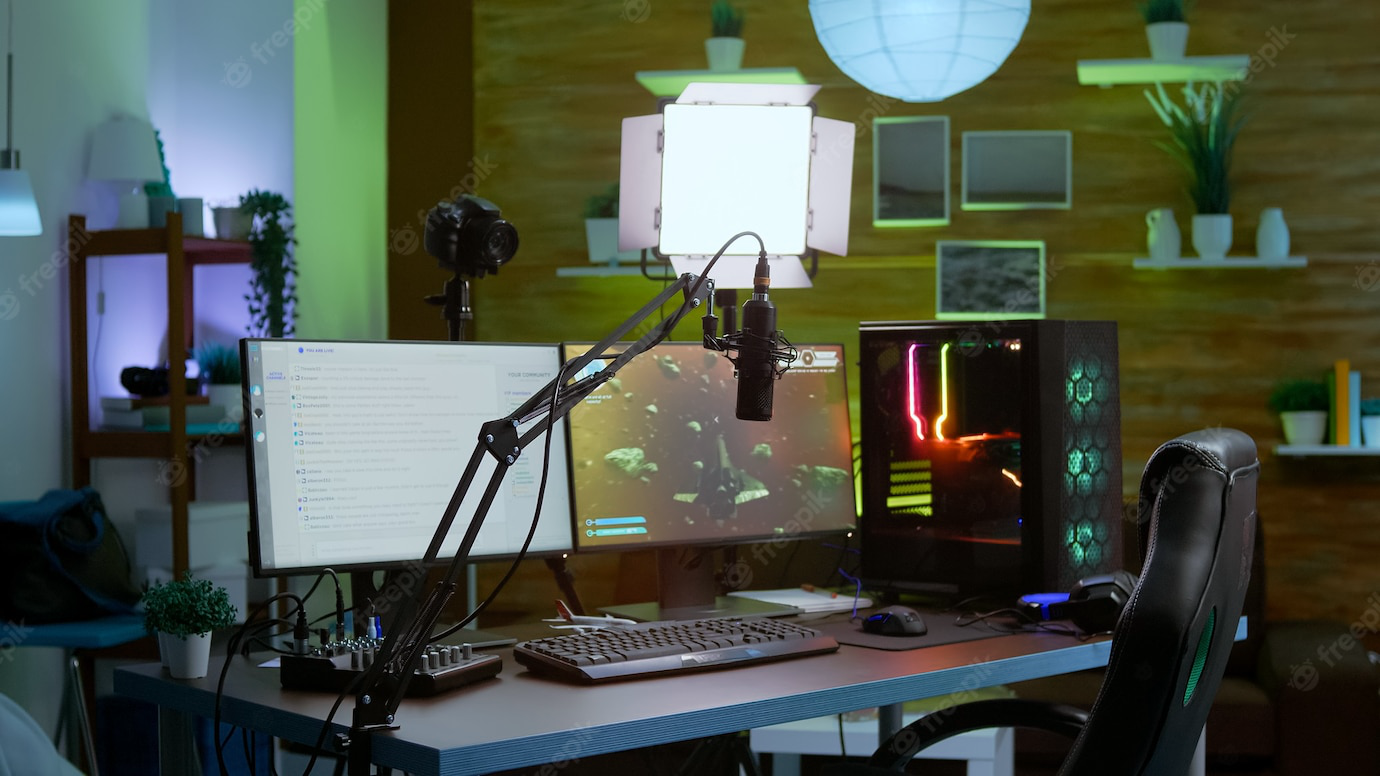

In [ ]:
cv2_imshow(image)

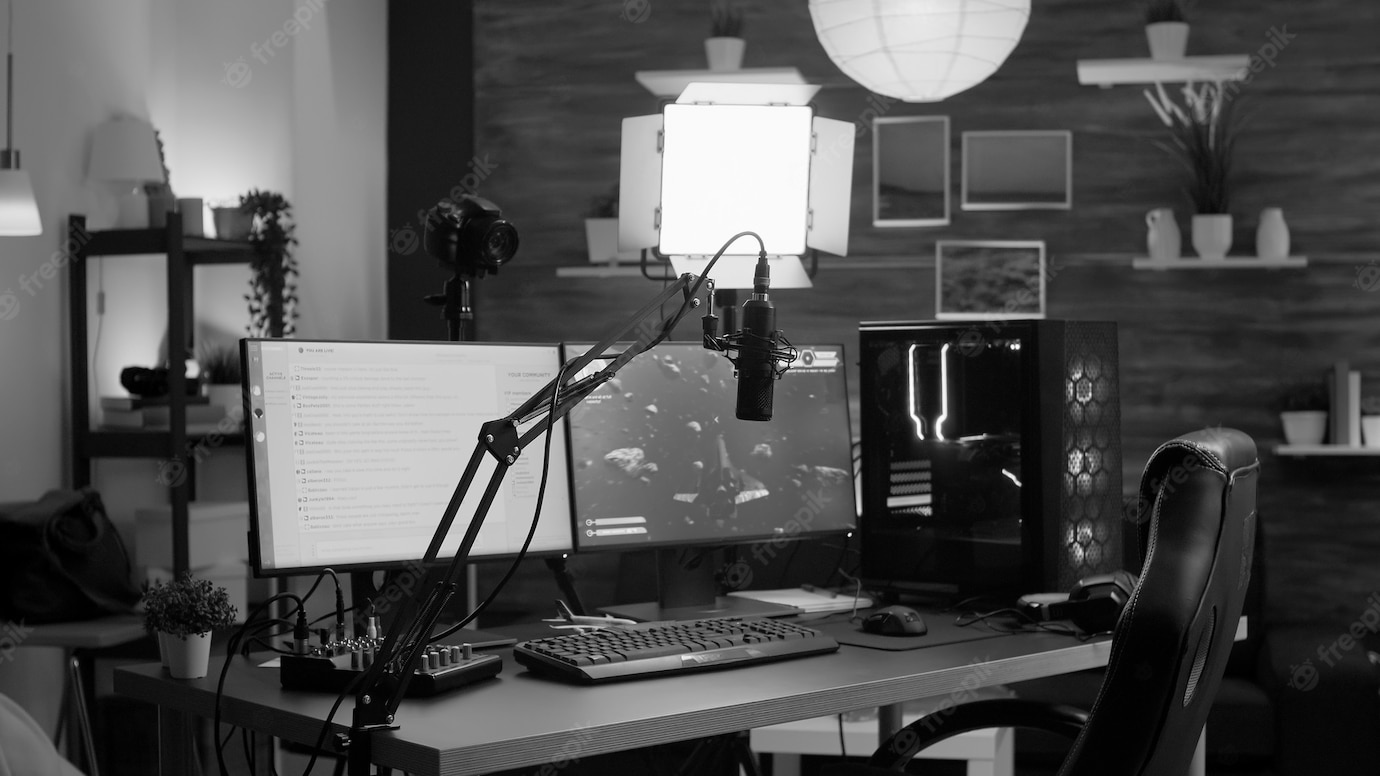

In [ ]:
cv2_imshow(img)

In [ ]:
image.shape

(776, 1380, 3)

In [ ]:
k = np.ceil(0.8*776)
print(k)

621.0


processing...
compressing...
dimensões do canal r: (776, 1380)
arranging...


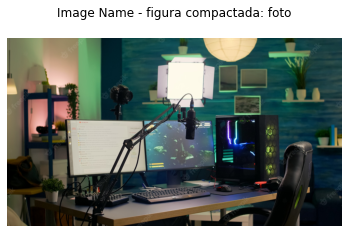

In [ ]:
k = 621
compress_image("foto", image, k)

In [ ]:
k = np.ceil(0.7*776)
print(k)

544.0


processing...
compressing...
dimensões do canal r: (776, 1380)
arranging...


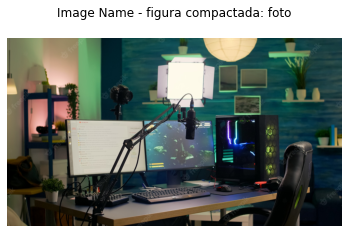

In [ ]:
k = 544
compress_image("foto", image, k)

In [ ]:
k = np.ceil(0.6*776)
print(k)

466.0


processing...
compressing...
dimensões do canal r: (776, 1380)
arranging...


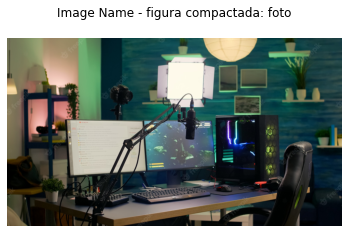

In [ ]:
k = 466
compress_image("foto", image, k)